In [2]:
import os
import copy as cp
import csv
import pandas as pd
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# DATA PARAMETERS

survey = "HERMES" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 4450 # minimum wavelength of the data
max_wv = 5880 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra" # directory of the spectrum
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)

rv_dir =  r"C:\Users\kentb\Desktop\PDM\data\RV\delCep_rv.csv"  # directory of the RVs
df = pd.read_csv(rv_dir)
rv = df.rv.astype(float).values
e_rv = df.rv_err.astype(float).values
times = df.bjd.astype(float).values
unique_id = True
if survey == "CORALIE":
    try:
        ids = df.unique_id.astype(str).values
    except AttributeError:
        print("No unique_id column in the RV file, using bjd instead")
        unique_id = False
        ids = None
        times = times - int(min(times))
        print(times)
        print(obs_data.time_series.times)
elif survey == "HERMES":
    ids = df.unique_id.astype(int).values
obs_data.rearrange_time_series(rv=rv, times=times,ids=ids,unique_id=unique_id)

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra
Matching ratio -> 89 %


In [39]:
#Store each observation in a csv file.
for spec,unique_id in zip(obs_data.time_series.vals,obs_data.unique_ids):
    wave = spec.wv[0]
    flux = spec.sp[0]
    with open(r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\delCep_csv\%s.csv" % unique_id, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['wave', 'flux'])
        writer.writerows(zip(wave, flux))

In [22]:
import fileinput
import subprocess

In [26]:
def modify_and_run(file_path, line_number, new_content):
    # Read the content of the file
    with fileinput.FileInput(file_path, inplace=True, backup=".bak") as file:
        for i, line in enumerate(file, start=1):
            # Modify the specified line
            if i == line_number:
                print(new_content)
            else:
                print(line, end="")

    # Run the modified file
    subprocess.run(["python", r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\Rassine.py"])
    print("Done")

In [27]:
csv_dir = r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\delCep_csv"
for file in os.listdir(csv_dir):
    file_path = os.path.join(csv_dir, file)
    file_path = file_path.replace("\\","/")
    file_path = file_path.split("/")[-1]
    file_path = '/'+file_path
    print(file_path)
    modify_and_run(r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\Rassine_config.py", 28, 'spectrum_name = cwd+"/delCep_csv" + "%s"' % file_path)

/373279.csv
Done
/373280.csv
Done
/373281.csv
Done
/373371.csv
Done
/373372.csv
Done
/373457.csv
Done
/373458.csv
Done
/373459.csv
Done
/373547.csv
Done
/373548.csv
Done
/373549.csv
Done
/388335.csv
Done
/388336.csv
Done
/388337.csv
Done
/388535.csv
Done
/388536.csv
Done
/388537.csv
Done
/388729.csv
Done
/388730.csv
Done
/388731.csv
Done
/388862.csv
Done
/388863.csv
Done
/388864.csv
Done
/388952.csv
Done
/388953.csv
Done
/388954.csv
Done
/389044.csv
Done
/389045.csv
Done
/389046.csv
Done
/441796.csv
Done
/441800.csv
Done
/441810.csv
Done
/442182.csv
Done
/442191.csv
Done
/442196.csv
Done
/442380.csv
Done
/442386.csv
Done
/442390.csv
Done
/442699.csv
Done
/442703.csv
Done
/442707.csv
Done
/443168.csv
Done
/443171.csv
Done
/443175.csv
Done
/443502.csv
Done
/443506.csv
Done
/443509.csv
Done
/443722.csv
Done
/443734.csv
Done
/444097.csv
Done
/444102.csv
Done
/444105.csv
Done
/444357.csv
Done
/444362.csv
Done
/444365.csv
Done
/491601.csv
Done
/491606.csv
Done
/491625.csv
Done
/491639.csv
Do

In [31]:
# PERIODOGRAM PARAMETERS

baseline = np.max(obs_data.time_series.times) - np.min(obs_data.time_series.times) # baseline of the data
min_freq = 2/baseline # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 1/2 # depends on the star.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 10
periodogram_grid_resolution = points_per_peak*max_freq*baseline # frequency resolution of the periodograms

# RESULS DIRECTORY

results_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine' # directory of the results

In [32]:
## Compute periodograms

# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,periodogram_grid_resolution=periodogram_grid_resolution)

obs_data.periodicity_detector.calc_GLS()

print("GLS done",flush=True)

obs_data.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True)

print("PDC done",flush=True)

obs_data.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)

print("USURPER done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")

print("Shape done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")

print("Shift done",flush=True)

GLS done


PDC done
USURPER done
Shape done
Shift done


In [33]:
# Save the observations instance in a csv file with the name of the spec_dir name in the results directory

with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_{str(min_wv)}_{str(max_wv)}_rassine.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["freq", "gls","usurper","pdc_unbiased","shape_periodogram", "shift_periodogram"])
    for i in range(len(obs_data.periodicity_detector.results_frequency['GLS'])):
        writer.writerow([obs_data.periodicity_detector.results_frequency['GLS'][i],
                        obs_data.periodicity_detector.results_power['GLS'][i],
                        obs_data.periodicity_detector.results_power['USURPER'][i],
                        obs_data.periodicity_detector.results_power['PDC_unbiased'][i],
                        obs_data.periodicity_detector.results_power['shape_periodogram'][i],
                        obs_data.periodicity_detector.results_power['shift_periodogram'][i]])

(5800.0, 5900.0)

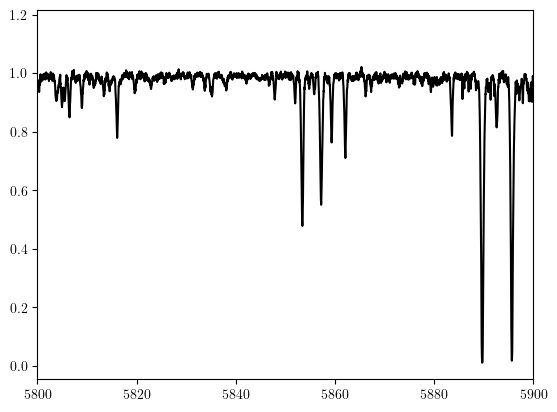

In [30]:
# plt.plot(spec_rassine['wave'],spec_rassine['flux_used'])
plt.plot(rassine_spec['wave'],rassine_spec['flux']/rassine_spec['output']['continuum_linear'])
#plot only between 5880 and 5900
plt.xlim(5800,5900)

In [28]:
#replace in obs_data.time_series.vals the flux by the flux/continuum

for idx,file in enumerate(os.listdir('delCep_output')):
    file_path = os.path.join('delCep_output', file)
    unique_id=file.split('.')[0]
    unique_id=unique_id.split('_')[-1]
    rassine_spec = pd.read_pickle(file_path)
    flux = rassine_spec['flux']/rassine_spec['output']['continuum_linear']
    if str(obs_data.unique_ids[idx]) == unique_id:
        print(obs_data.unique_ids[idx],unique_id," ok")
        obs_data.time_series.vals[idx].sp[0] = flux
    

373279 373279  ok
373280 373280  ok
373281 373281  ok
373371 373371  ok
373372 373372  ok
373457 373457  ok
373458 373458  ok
373459 373459  ok
373547 373547  ok
373548 373548  ok
373549 373549  ok
388335 388335  ok
388336 388336  ok
388337 388337  ok
388535 388535  ok
388536 388536  ok
388537 388537  ok
388729 388729  ok
388730 388730  ok
388731 388731  ok
388862 388862  ok
388863 388863  ok
388864 388864  ok
388952 388952  ok
388953 388953  ok
388954 388954  ok
389044 389044  ok
389045 389045  ok
389046 389046  ok
441796 441796  ok
441800 441800  ok
441810 441810  ok
442182 442182  ok
442191 442191  ok
442196 442196  ok
442380 442380  ok
442386 442386  ok
442390 442390  ok
442699 442699  ok
442703 442703  ok
442707 442707  ok
443168 443168  ok
443171 443171  ok
443175 443175  ok
443502 443502  ok
443506 443506  ok
443509 443509  ok
443722 443722  ok
443734 443734  ok
444097 444097  ok
444102 444102  ok
444105 444105  ok
444357 444357  ok
444362 444362  ok
444365 444365  ok
491601 491

In [13]:
from sparta.Statistics import open_csv

In [35]:
results_sparta = open_csv(r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\delCep_Hermes_spectra_4450_6200_sparta.csv')
results_rassine = open_csv(r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\delCep_Hermes_spectra_4450_6200_rassine.csv')

In [15]:
plt.style.use('sparta')

In [16]:
from matplotlib.ticker import MaxNLocator

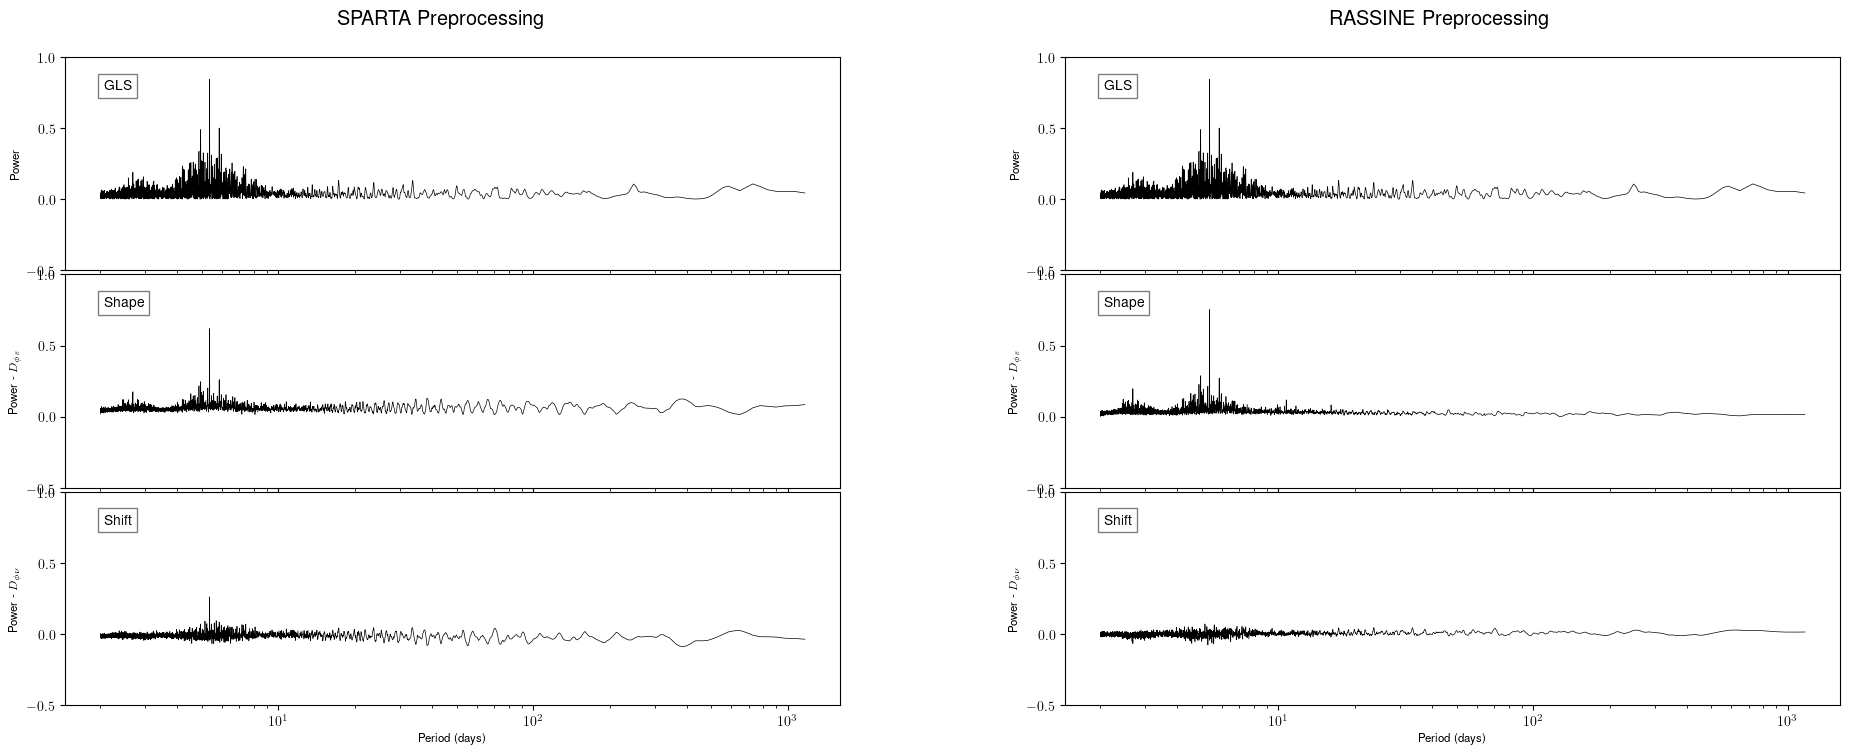

In [37]:
fig = plt.figure(constrained_layout=False, figsize=(20, 8))
fig.suptitle(r'SPARTA vs RASSINE Preprocessing', fontsize='x-large')

subfigs = fig.subfigures(1, 2)

for outerind, subfig in enumerate(subfigs.flat):
    if outerind==0:
        results = results_sparta
        subfig.suptitle(r'SPARTA Preprocessing', fontsize='x-large')
    else:
        results = results_rassine
        subfig.suptitle(r'RASSINE Preprocessing', fontsize='x-large')
    axs = subfig.subplots(3, 1,sharex=True)
    for innerind, ax in enumerate(axs.flat):
        if innerind==0:
            ax.plot(results['period'],results['gls'],linewidth=0.5)
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            ax.plot(results['period'],results['shape'],linewidth=0.5)
            ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
        elif innerind==2:
            ax.plot(results['period'],results['shift'],linewidth=0.5)
            ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
            ax.set_xlabel('Period (days)', fontsize='small')
        # Add a small text box
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
        ax.set_ylim(-0.5,1)
        ax.set_xscale('log')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
# plt.savefig('delCep_spartaVSrassine_4450_6200.png', dpi=300)
plt.show()